# 🐦 BIRD RECOGNITION

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt

### CHARGEMENT DES DONNÉES

In [ ]:
dataset_path = "images" 

# 80% entraînement, 20% test
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Found 3422 files belonging to 20 classes.
Using 2738 files for training.
Found 3422 files belonging to 20 classes.
Using 684 files for validation.


### IMPORTATION DU MODELE RESNET50

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = True

# On défreeze les 30 dernières
for layer in base_model.layers[:-30]:
    layer.trainable = False

### AJOUT DES COUCHES POUR LA CLASSIFICATION

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.45)(x)  # 45% des neurones sont désactivés pendant l'entraînement
x = BatchNormalization()(x)
predictions = Dense(20, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### ENTRAINEMENT DU MODÈLE 

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[
    EarlyStopping(patience=3, restore_best_weights=True)
])

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 50s 345ms/step - accuracy: 0.6624 - loss: 1.2442 - val_accuracy: 0.4795 - val_loss: 1.8518
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.9523 - loss: 0.2233 - val_accuracy: 0.9167 - val_loss: 0.5612
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.9776 - loss: 0.1200 - val_accuracy: 0.9561 - val_loss: 0.1751
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.9914 - loss: 0.0607 - val_accuracy: 0.9605 - val_loss: 0.1745
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.9904 - loss: 0.0621 - val_accuracy: 0.9108 - val_loss: 0.3404
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.9916 - loss: 0.0484 - val_accuracy: 0.9488 - val_loss: 0.2073
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9912 - loss: 0.0425 - val_accuracy: 0.9678 - val_loss: 0.1474
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - accuracy: 0.9945 - loss: 0.0286 - val_accu

### ÉVALUATION DES PERFORMANCES

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Accuracy : {accuracy*100:.2f}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9769 - loss: 0.1168
Accuracy : 96.78%


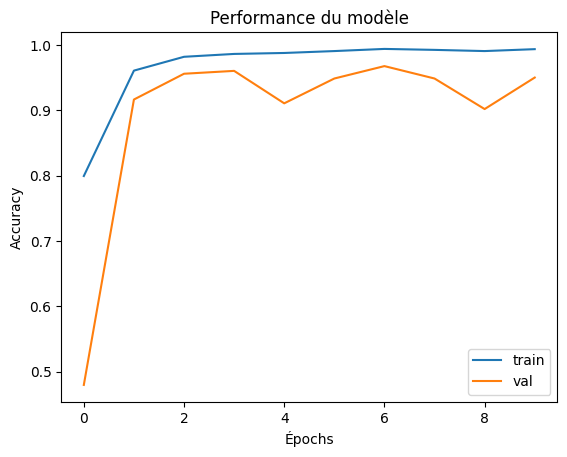

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Performance du modèle")
plt.show()

### SAUVEGARDE DU MODÈLE

In [ ]:
model.save("R-45-30-96,78.keras")
# ResNet50, 45% de dropout, 30 dernières couches dégelées, 96,78% d'accuracy

Modèle sauvegardé sous le nom 'R-45-30-96,78.keras'
